In [1]:
# Py3_Jupyter_Nb_Pandas(金融Comprehensive分析)_GF_2024-01-22.ipynb
# Create By GF 2024-01-22 18:19

In [2]:
import pandas as pd # -> Pandas Version 1.4.1
import matplotlib.pyplot as plt # -> Matplotlib Version 3.6.3

In [3]:
# 导入外部脚本。
# ##################################################
from Py3_Script_Finance_Indicator_Func import *
from Py3_Script_Finance_Tools_Func import *
from Py3_Script_Finance_Machine_Learn_Func import *

In [4]:
# Matplotlib 相关配置。
# ##################################################
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [5]:
# 读取 CSV。
# ##################################################
StkPDF = pd.read_csv("./Datas/Stock.csv")

In [6]:
# 转换类型: 初次读取后转换。
# ##################################################
StkPDF["Date"] = StkPDF["Date"].astype("datetime64[ns]")

# ##################################################
StkPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000


In [7]:
# 筛选数据: 筛选出成交量 (Volume) 不为 0.0 的数据。
# ##################################################
StkPDF = StkPDF[StkPDF["Volume"] != 0.0]

# ##################################################
StkPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000


In [8]:
# 计算数据: 分配行号。
# ##################################################
SourceDataPDF = StkPDF.copy()

# 排序计算: rank 函数达到 SQL 中类似 ROW_NUMBER 的功能。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
Sorted = TEMPPDF.sort_values("Date", ascending=True)
# ..................................................
TEMPPDF["Row_Num"] = Sorted["Date"].rank(ascending=True, method='first')
# ..................................................
TEMPPDF["Row_Num"] = TEMPPDF["Row_Num"].astype("int64")
# ..................................................
StkNumberedPDF = TEMPPDF

# ##################################################
StkNumberedPDF[["Row_Num", "Date", "Close"]]

,Row_Num,Date,Close
0,2567,2015-12-31,7.77
1,2566,2015-12-30,7.93
2,2565,2015-12-29,7.84
3,2564,2015-12-28,7.71
4,2563,2015-12-25,8.03
...,...,...,...
2647,5,2005-02-04,7.00
2648,4,2005-02-03,6.75
2649,3,2005-02-02,6.90
2650,2,2005-02-01,6.42


In [9]:
# 计算数据: 金融指标(Finance Indicator)。
# ##################################################
SourceDataPDF = StkNumberedPDF.sort_values("Date", ascending=True)

# 提取数据: 提取公历N年前数据。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
# DataFrame 中的 apply:
# -> 当 axis=1 时，对每行执行指定函数。
# -> 当 axis=0 时，对每列执行指定函数。
TEMPPDF["EMA12"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_EMA(Index=X["Row_Num"], Period=12, Close=X["Close"]), axis=1)
TEMPPDF["EMA26"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_EMA(Index=X["Row_Num"], Period=26, Close=X["Close"]), axis=1)
# ..................................................
TEMPPDF["MACD_DIF"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_MACD_DIF(EMA12=X["EMA12"], EMA26=X["EMA26"]), axis=1)
TEMPPDF["MACD_DEA"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_MACD_DEA(Index=X["Row_Num"], MACD_DIF=X["MACD_DIF"]), axis=1)
TEMPPDF["MACD_STICK"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_MACD_STICK(MACD_DIF=X["MACD_DIF"], MACD_DEA=X["MACD_DEA"]), axis=1)
# ..................................................
TEMPPDF["RSI6"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_RSI(Index=X["Row_Num"], Period=6, Change=X["Change"]), axis=1)
TEMPPDF["RSI12"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_RSI(Index=X["Row_Num"], Period=12, Change=X["Change"]), axis=1)
TEMPPDF["RSI24"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_RSI(Index=X["Row_Num"], Period=24, Change=X["Change"]), axis=1)
# ..................................................
StkIndicatorPDF = TEMPPDF

# ##################################################
StkIndicatorPDF[["Row_Num", "Date", "Close", "MACD_DIF", "MACD_DEA", "MACD_STICK", "RSI6", "RSI12", "RSI24"]]

,Row_Num,Date,Close,MACD_DIF,MACD_DEA,MACD_STICK,RSI6,RSI12,RSI24
2651,1,2005-01-31,6.81,0.000000,0.000000,0.000000,NaN,NaN,NaN
2650,2,2005-02-01,6.42,-0.031111,-0.006222,-0.049778,NaN,NaN,NaN
2649,3,2005-02-02,6.90,-0.016841,-0.008346,-0.016990,NaN,NaN,NaN
2648,4,2005-02-03,6.75,-0.017434,-0.010164,-0.014541,NaN,NaN,NaN
2647,5,2005-02-04,7.00,0.002243,-0.007682,0.019850,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4,2563,2015-12-25,8.03,0.121185,0.101988,0.038394,78.431373,58.333333,55.942029
3,2564,2015-12-28,7.71,0.103309,0.102252,0.002113,55.555556,51.470588,51.604278
2,2565,2015-12-29,7.84,0.098496,0.101501,-0.006010,50.769231,62.406015,52.741514
1,2566,2015-12-30,7.93,0.100783,0.101357,-0.001149,52.941176,61.832061,54.241645


In [10]:
# 计算数据: 机器学习(Machine Learn)。
# ##################################################
SourceDataPDF = StkIndicatorPDF.copy()

# 提取标签。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
TEMPPDF["BIN_CL"] = TEMPPDF["Chg_Pct"].apply(lambda X: int(1) if X >= 0.02 else int(0))
# ..................................................
StkMLPDF = TEMPPDF

# 训练模型。
# --------------------------------------------------
FeaturesCols = ["Open", "High", "Low", "Close", "Volume", "MACD_DIF", "MACD_DEA", "MACD_STICK"]
RFModel = MLFunc_Scikit_Learn_Random_Forest_Classifier_From_Pandas(StkMLPDF, FeaturesCols=FeaturesCols, LabelCol="BIN_CL")

# 预测结果。
# --------------------------------------------------
TEMPPDF = StkMLPDF
# ..................................................
TEMPPDF["MLP_RF"] = TEMPPDF.apply(lambda X: [[
                                               X["Open"],
                                               X["High"],
                                               X["Low"],
                                               X["Close"],
                                               X["Volume"],
                                               X["MACD_DIF"],
                                               X["MACD_DEA"],
                                               X["MACD_STICK"]
                                              ]], axis=1)
TEMPPDF["MLP_RF"] = TEMPPDF["MLP_RF"].apply(lambda X: RFModel[1].predict(X)[0])
# ..................................................
StkMLPDF = TEMPPDF

# ##################################################
print("Accuracy of Model : %f" % RFModel[0])
StkMLPDF[["Row_Num", "Date", "Close", "Chg_Pct", "BIN_CL", "MLP_RF"]]

Accuracy of Model : 0.801556


,Row_Num,Date,Close,Chg_Pct,BIN_CL,MLP_RF
2651,1,2005-01-31,6.81,-0.018732,0,0
2650,2,2005-02-01,6.42,-0.057269,0,0
2649,3,2005-02-02,6.90,0.074766,1,1
2648,4,2005-02-03,6.75,-0.021739,0,0
2647,5,2005-02-04,7.00,0.037037,1,1
...,...,...,...,...,...,...
4,2563,2015-12-25,8.03,0.005006,0,0
3,2564,2015-12-28,7.71,-0.039851,0,0
2,2565,2015-12-29,7.84,0.016861,0,0
1,2566,2015-12-30,7.93,0.011480,0,0


In [11]:
# 计算数据: 买卖信号(Signal)。
# ##################################################
LEFTPDF = StkIndicatorPDF.sort_values("Date", ascending=True)
RIGHPDF = StkMLPDF.sort_values("Date", ascending=True)
RIGHPDF = StkMLPDF[["Row_Num", "Code", "MLP_RF"]]
# ..................................................
TEMPPDF = pd.merge(left=LEFTPDF, right=RIGHPDF, how="left", on=["Row_Num", "Code"])
# ..................................................
StkSignalPDF = TEMPPDF

# 提取数据: 提取公历N年前数据。
# --------------------------------------------------
TEMPPDF = StkSignalPDF
# ..................................................
# DataFrame 中的 apply:
# -> 当 axis=1 时，对每行执行指定函数。
# -> 当 axis=0 时，对每列执行指定函数。
TEMPPDF["Sig_Buy"] = TEMPPDF.apply(lambda X: MapFunc_FinTool_Backtest_Signal(
                                                  X["MACD_DIF"] > X["MACD_DEA"],
                                                  X["MACD_DIF"] > 0,
                                                  X["MLP_RF"] == 1,
                                                  How="All"
                                              ), axis=1)
# ..................................................
TEMPPDF["Sig_Sell"] = TEMPPDF.apply(lambda X: MapFunc_FinTool_Backtest_Signal(
                                                   X["MACD_DIF"] <= X["MACD_DEA"],
                                                   How="Any"
                                               ), axis=1)
# ..................................................
StkSignalPDF = TEMPPDF

# ##################################################
StkSignalPDF[["Row_Num", "Date", "Close", "MACD_DIF", "MACD_DEA", "MACD_STICK", "RSI6", "RSI12", "RSI24", "MLP_RF", "Sig_Buy", "Sig_Sell"]]

,Row_Num,Date,Close,MACD_DIF,MACD_DEA,MACD_STICK,RSI6,RSI12,RSI24,MLP_RF,Sig_Buy,Sig_Sell
0,1,2005-01-31,6.81,0.000000,0.000000,0.000000,NaN,NaN,NaN,0,0,1
1,2,2005-02-01,6.42,-0.031111,-0.006222,-0.049778,NaN,NaN,NaN,0,0,1
2,3,2005-02-02,6.90,-0.016841,-0.008346,-0.016990,NaN,NaN,NaN,1,0,1
3,4,2005-02-03,6.75,-0.017434,-0.010164,-0.014541,NaN,NaN,NaN,0,0,1
4,5,2005-02-04,7.00,0.002243,-0.007682,0.019850,NaN,NaN,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2562,2563,2015-12-25,8.03,0.121185,0.101988,0.038394,78.431373,58.333333,55.942029,0,0,0
2563,2564,2015-12-28,7.71,0.103309,0.102252,0.002113,55.555556,51.470588,51.604278,0,0,0
2564,2565,2015-12-29,7.84,0.098496,0.101501,-0.006010,50.769231,62.406015,52.741514,0,0,1
2565,2566,2015-12-30,7.93,0.100783,0.101357,-0.001149,52.941176,61.832061,54.241645,0,0,1


In [12]:
# 计算数据: 回测(Backtesting)。
# ##################################################
SourceDataPDF = StkSignalPDF.sort_values("Date", ascending=True)

# 计算数据: 实时资产变动。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
# DataFrame 中的 apply:
# -> 当 axis=1 时，对每行执行指定函数。
# -> 当 axis=0 时，对每列执行指定函数。
TEMPPDF["Account"] = TEMPPDF.apply(lambda X: MapFunc_FinTool_Backtest_Real_Time_Asset_by_Long_Buy( # -> 涉及全局变量, 不可多次调用。
                                                  Sig_Buy=X["Sig_Buy"],
                                                  Sig_Sell=X["Sig_Sell"],
                                                  Close=X["Close"],
                                                  Stop_Profit="percent:0.10",
                                                  Stop_Loss="percent:-0.02",
                                                  Rtn="Tuple"
                                              ),axis=1)
# ..................................................
TEMPPDF["Funds"]   = TEMPPDF["Account"].apply(lambda X: X[0])
TEMPPDF["Stk_Val"] = TEMPPDF["Account"].apply(lambda X: X[2])
# ..................................................
TEMPPDF["Asset"] = TEMPPDF["Funds"] + TEMPPDF["Stk_Val"]
# ..................................................
StkBacktestingPDF = TEMPPDF

# 计算数据: 盈利比率。
# --------------------------------------------------
TEMPPDF = StkBacktestingPDF
# ..................................................
TEMPPDF["Asset_Shift_Plus_1"] = TEMPPDF["Asset"].shift(1)
TEMPPDF["Profitability_Ratio"] = (TEMPPDF["Asset_Shift_Plus_1"] - TEMPPDF["Asset"]) / TEMPPDF["Asset"]
# ..................................................
StkBacktestingPDF = TEMPPDF

# ##################################################
StkBacktestingPDF[["Row_Num", "Date", "Close", "Sig_Buy", "Sig_Sell", "Funds", "Stk_Val", "Asset"]]

,Row_Num,Date,Close,Sig_Buy,Sig_Sell,Funds,Stk_Val,Asset
0,1,2005-01-31,6.81,0,1,1000000.0,0.0,1000000.0
1,2,2005-02-01,6.42,0,1,1000000.0,0.0,1000000.0
2,3,2005-02-02,6.90,0,1,1000000.0,0.0,1000000.0
3,4,2005-02-03,6.75,0,1,1000000.0,0.0,1000000.0
4,5,2005-02-04,7.00,1,0,400.0,999600.0,1000000.0
...,...,...,...,...,...,...,...,...
2562,2563,2015-12-25,8.03,0,0,631.0,3606525.0,3607156.0
2563,2564,2015-12-28,7.71,0,0,631.0,3606525.0,3607156.0
2564,2565,2015-12-29,7.84,0,1,631.0,3606525.0,3607156.0
2565,2566,2015-12-30,7.93,0,1,631.0,3606525.0,3607156.0


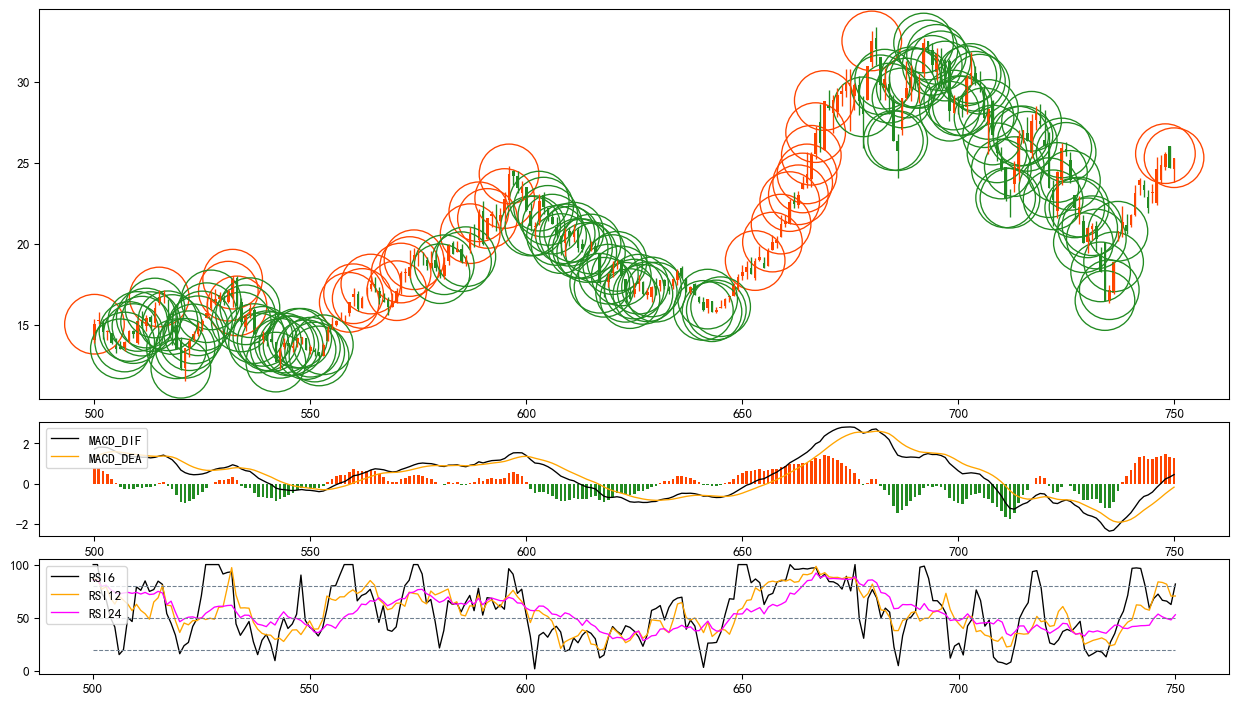

In [13]:
# Matplotlib 绘制数据: 买卖信号(Signal)。
# ##################################################
DrawPDF = StkSignalPDF

# 筛选数据: 放大局部数据。
# --------------------------------------------------
#DrawPDF = DrawPDF[(200 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 1500)]
DrawPDF = DrawPDF[(500 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 750)]

# 画布配置。
# --------------------------------------------------
fig = plt.figure(figsize=(16, 9), dpi=96)
# ..................................................
Grid = plt.GridSpec(5, 1, figure=fig)

# K 线数据: 红绿 K 线的 Bottom、Height。
# --------------------------------------------------
KLine_Red = DrawPDF[DrawPDF["Change"] >= 0.0]
KLine_Red_Bottom = KLine_Red["Open"]
KLine_Red_Height = KLine_Red["Close"] - KLine_Red["Open"]
# ..................................................
KLine_Gre = DrawPDF[DrawPDF["Change"] <  0.0]
KLine_Gre_Bottom = KLine_Gre["Close"]
KLine_Gre_Height = KLine_Gre["Open"] - KLine_Gre["Close"]

# 绘制数据: 绘制红绿 K 线。
# --------------------------------------------------
ax1 = plt.subplot(Grid[0:3])
# ..................................................
ax1.bar(x=KLine_Red["Row_Num"], height=KLine_Red_Height, width=0.6, bottom=KLine_Red_Bottom, color="#FF4500")
ax1.bar(x=KLine_Gre["Row_Num"], height=KLine_Gre_Height, width=0.6, bottom=KLine_Gre_Bottom, color="#228B22")
# ..................................................
ax1.vlines(x=KLine_Red["Row_Num"], ymin=KLine_Red["Low"], ymax=KLine_Red["High"], colors="#FF4500", linewidth=1)
ax1.vlines(x=KLine_Gre["Row_Num"], ymin=KLine_Gre["Low"], ymax=KLine_Gre["High"], colors="#228B22", linewidth=1)

# MACD 数据: 红绿 MACD STICK。
# --------------------------------------------------
MACD_STICK_Red = DrawPDF[DrawPDF["MACD_STICK"] >= 0.0]
# ..................................................
MACD_STICK_Gre = DrawPDF[DrawPDF["MACD_STICK"] <  0.0]

# 绘制数据: 绘制 MACD DIF 和 DEA。
# --------------------------------------------------
ax2 = plt.subplot(Grid[3:4])
# ..................................................
ax2.bar(x=MACD_STICK_Red["Row_Num"], height=MACD_STICK_Red["MACD_STICK"], width=0.6, bottom=0, color="#FF4500")
ax2.bar(x=MACD_STICK_Gre["Row_Num"], height=MACD_STICK_Gre["MACD_STICK"], width=0.6, bottom=0, color="#228B22")
# ..................................................
ax2.plot(DrawPDF["Row_Num"], DrawPDF["MACD_DIF"], linewidth=1.0, color="#000000", label="MACD_DIF")
ax2.plot(DrawPDF["Row_Num"], DrawPDF["MACD_DEA"], linewidth=1.0, color="#FFA500", label="MACD_DEA")
# ..................................................
ax2.legend(loc="upper left")

# 绘制数据: 绘制 RSI 指标。
# --------------------------------------------------
ax3 = plt.subplot(Grid[4:5])
# ..................................................
ax3.plot(DrawPDF["Row_Num"], DrawPDF["RSI6"], linewidth=1.0, color="#000000", label="RSI6")
ax3.plot(DrawPDF["Row_Num"], DrawPDF["RSI12"], linewidth=1.0, color="#FFA500", label="RSI12")
ax3.plot(DrawPDF["Row_Num"], DrawPDF["RSI24"], linewidth=1.0, color="#FF00FF", label="RSI24")
# ..................................................
ax3.hlines(y=80, xmin=DrawPDF["Row_Num"].min(), xmax=DrawPDF["Row_Num"].max(), linewidth=0.8, linestyle="dashed", color="#708090")
ax3.hlines(y=50, xmin=DrawPDF["Row_Num"].min(), xmax=DrawPDF["Row_Num"].max(), linewidth=0.8, linestyle="dashed", color="#708090")
ax3.hlines(y=20, xmin=DrawPDF["Row_Num"].min(), xmax=DrawPDF["Row_Num"].max(), linewidth=0.8, linestyle="dashed", color="#708090")
# ..................................................
ax3.legend(loc="upper left")

# Signal 数据: Sig_Buy 和 Sig_Sell 数据。
# --------------------------------------------------
Sig_Buy = DrawPDF[DrawPDF["Sig_Buy"] == 1]
# ..................................................
Sig_Sell = DrawPDF[DrawPDF["Sig_Sell"] == 1]

# 绘制数据: 绘制 Signal 标记点。
# --------------------------------------------------
ax1.scatter(x=Sig_Buy["Row_Num"], y=Sig_Buy["Close"], s=2000, marker="o", alpha=1, color="none", edgecolors="#FF4500")
ax1.scatter(x=Sig_Sell["Row_Num"], y=Sig_Sell["Close"], s=2000, marker="o", alpha=1, color="none", edgecolors="#228B22")

# ##################################################
plt.show()

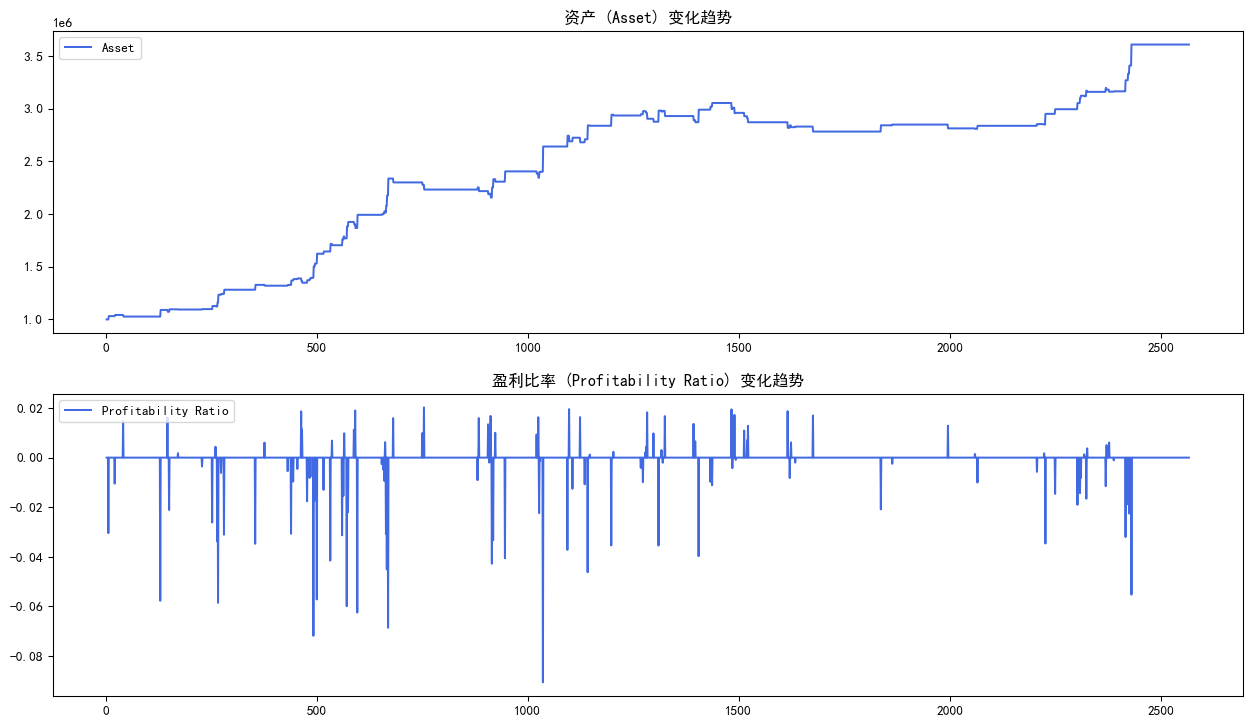

In [14]:
# Matplotlib 绘制数据: 回测(Backtesting)。
# ##################################################
DrawPDF = StkBacktestingPDF

# 筛选数据: 放大局部数据。
# --------------------------------------------------
#DrawPDF = DrawPDF[(200 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 1500)]
#DrawPDF = DrawPDF[(500 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 750)]

# 画布配置。
# --------------------------------------------------
fig = plt.figure(figsize=(16, 9), dpi=96)
# ..................................................
Grid = plt.GridSpec(4, 1, figure=fig, hspace=0.5)

# 绘制数据: 绘制资产走势(Asset Trend)。
# --------------------------------------------------
ax1 = plt.subplot(Grid[0:2])
# ..................................................
ax1.plot(DrawPDF["Row_Num"], DrawPDF["Asset"], color="#4169E1", label="Asset")
# ..................................................
ax1.legend(loc="upper left")
# ..................................................
ax1.set_title("资产 (Asset) 变化趋势")

# 绘制数据: 绘制盈利比率(Profitability Ratio)。
# --------------------------------------------------
ax2 = plt.subplot(Grid[2:4])
# ..................................................
ax2.plot(DrawPDF["Row_Num"], DrawPDF["Profitability_Ratio"], color="#4169E1", label="Profitability Ratio")
# ..................................................
ax2.legend(loc="upper left")
# ..................................................
ax2.set_title("盈利比率 (Profitability Ratio) 变化趋势")

# ##################################################
plt.show()